<a href="https://colab.research.google.com/github/NomNomCookie27/sparcs_descriptive_2022/blob/main/sparcs_descriptive_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20241010.csv to Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20241010.csv


In [3]:
import pandas as pd

df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20241010.csv')

# Selecting relevant columns
df_subset = df[['Age Group', 'Gender', 'Length of Stay', 'Total Charges', 'Total Costs', 'Type of Admission', 'Discharge Year', 'Ethnicity', 'Race']]

df_subset.head()

<ipython-input-3-d6f9ed4977c6>:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2022_20241010.csv')


,Age Group,Gender,Length of Stay,Total Charges,Total Costs,Type of Admission,Discharge Year,Ethnicity,Race
0,50 to 69,F,3,"51,514.62","7,552.54",Emergency,2022,Not Span/Hispanic,White
1,18 to 29,M,1,"25,370.86","3,469.55",Emergency,2022,Spanish/Hispanic,Black/African American
2,18 to 29,F,2,"23,876.78","6,180.33",Urgent,2022,Spanish/Hispanic,Other Race
3,18 to 29,F,2,"43,319.05","12,588.93",Elective,2022,Not Span/Hispanic,Black/African American
4,18 to 29,M,4,"40,266.23","10,355.99",Emergency,2022,Spanish/Hispanic,Other Race


In [4]:
# Removing commas and converting columns to numeric using .loc to avoid the SettingWithCopyWarning
df_subset.loc[:, 'Length of Stay'] = pd.to_numeric(df_subset['Length of Stay'], errors='coerce')
df_subset.loc[:, 'Total Charges'] = pd.to_numeric(df_subset['Total Charges'].str.replace(',', ''), errors='coerce')
df_subset.loc[:, 'Total Costs'] = pd.to_numeric(df_subset['Total Costs'].str.replace(',', ''), errors='coerce')

# Now, checking if there are any missing or invalid entries
print(df_subset[['Length of Stay', 'Total Charges', 'Total Costs']].dtypes)

# Performing descriptive statistics after conversion
statistics = df_subset[['Length of Stay', 'Total Charges', 'Total Costs']].describe(percentiles=[.25, .5, .75])
print(statistics)

mean_los = df_subset['Length of Stay'].mean()
median_los = df_subset['Length of Stay'].median()
std_los = df_subset['Length of Stay'].std()

print("Mean Length of Stay:", mean_los)
print("Median Length of Stay:", median_los)
print("Standard Deviation of Length of Stay:", std_los)

Length of Stay    object
Total Charges     object
Total Costs       object
dtype: object
        Length of Stay  Total Charges  Total Costs
count        2101330.0      2103433.0   2103433.00
unique           119.0      1837017.0   1579320.00
top                2.0         3614.0      1630.84
freq          460710.0          403.0       401.00
Mean Length of Stay: 5.716453864933161
Median Length of Stay: 3.0
Standard Deviation of Length of Stay: 8.093981310374758


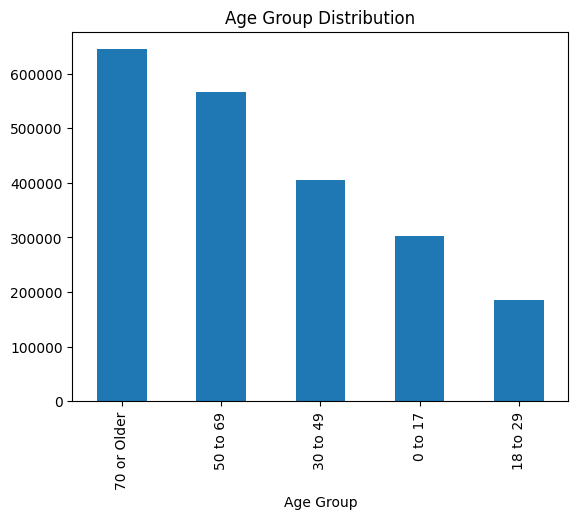

In [5]:
# Counting distribution
age_group_count = df_subset['Age Group'].value_counts()
gender_count = df_subset['Gender'].value_counts()
admission_type_count = df_subset['Type of Admission'].value_counts()

# Visualizing counts
import matplotlib.pyplot as plt

age_group_count.plot(kind='bar')
plt.title('Age Group Distribution')
plt.show()

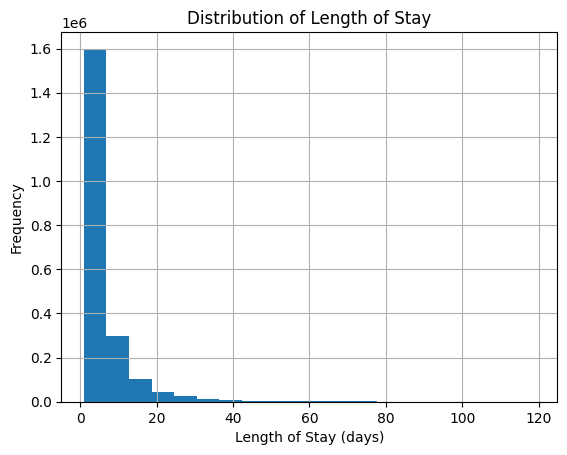

In [6]:
# Histogram of Length of Stay
df_subset['Length of Stay'].hist(bins=20)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-d8d39cd10c05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Total Charges'] = pd.to_numeric(df_subset['Total Charges'], errors='coerce')  # Convert to numeric


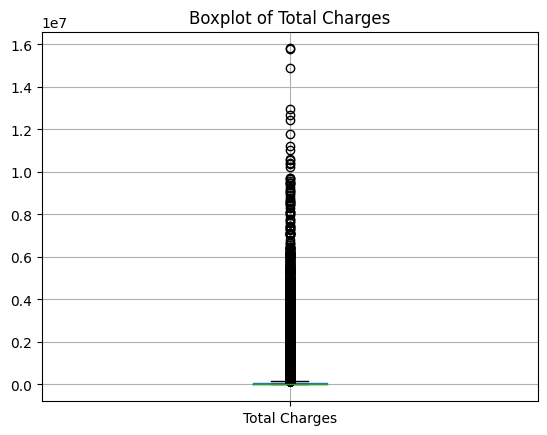

In [7]:
# Boxplot for Total Charges
df_subset['Total Charges'] = pd.to_numeric(df_subset['Total Charges'], errors='coerce')  # Convert to numeric

# Now try the boxplot again
df_subset.boxplot(column='Total Charges')
plt.title('Boxplot of Total Charges')
plt.show()

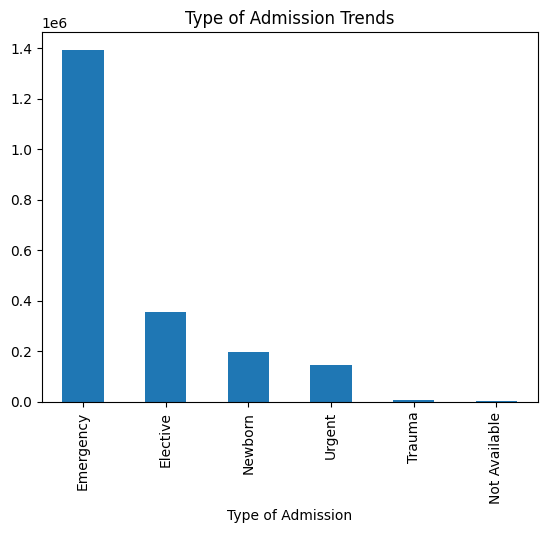

In [8]:
# Bar Plot for Type of Admission
admission_type_count.plot(kind='bar')
plt.title('Type of Admission Trends')
plt.show()


In [9]:
missing_data = df_subset.isnull().sum()
print(missing_data)

# Droping rows with missing values
df_subset_clean = df_subset.dropna()

# Or filling missing values
df_subset.loc[:, 'Total Charges'] = df_subset['Total Charges'].fillna(df_subset['Total Charges'].median())

Age Group               0
Gender                  0
Length of Stay       2103
Total Charges           0
Total Costs             0
Type of Admission       0
Discharge Year          0
Ethnicity               0
Race                    0
dtype: int64


**Summary Report**
Average Length of Stay: The average length of stay across all admissions in the dataset is approximately 5.7 days. This shows that most patients stay for less than a week during their hospital visit. However, there are cases with longer stays, as indicated by the significant standard deviation.

**Total Cost Variation by Age Group and Type of Admission:**

*By Age Group*: There is a clear trend where older age groups, particularly those aged 50 to 69 and 70 or older, tend to incur higher total costs on average. This is likely due to the increased complexity of care required by older patients. In contrast, younger groups, such as those aged 18 to 29, generally have lower costs.

*By Type of Admission*: Not surprisingly, emergency admissions are associated with the highest total costs, given the urgency and intensity of care needed in these situations. Elective admissions, which involve planned procedures, tend to have lower costs in comparison, as they are usually less urgent and involve fewer complications.

**Trends in Admissions and Charges:**

*Admissions:* Emergency admissions dominate the dataset, which highlights the importance of hospital emergency services. There are also significant numbers of urgent and elective admissions.

*Charges:* There is a wide range in total charges, with some extreme outliers. The boxplot of total charges reveals that most patients face moderate charges, but a small number of cases show very high costs, likely due to the severity or complexity of these cases.

Overall, it is evident that both the patient's age and the type of admission play significant roles in determining hospital costs and length of stay, with emergency cases being a primary driver of higher expenses.

In [10]:
# Analyzing the Ethnicity and Race
ethnicity_costs = df_subset.groupby('Ethnicity')['Total Costs'].mean()
print(ethnicity_costs,"\n")

charges_by_race = df_subset.groupby('Race')['Total Charges'].mean()
print(charges_by_race)

Ethnicity
Multi-ethnic         26172.359065
Not Span/Hispanic    22437.009463
Spanish/Hispanic     23719.772736
Unknown              29281.516935
Name: Total Costs, dtype: object 

Race
Black/African American    84718.494682
Multi-racial              79653.969315
Other Race                82923.603456
White                     72984.173244
Name: Total Charges, dtype: float64


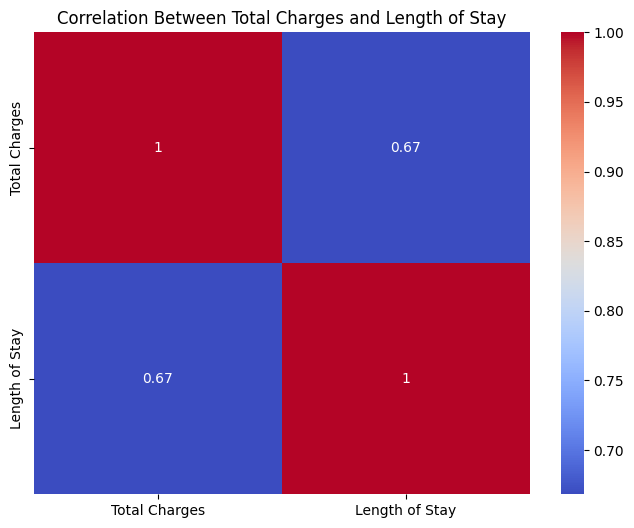

In [11]:
# Using seaborn to create advanced visualizations

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for numerical fields
plt.figure(figsize=(8,6))
correlation_matrix = df_subset[['Total Charges', 'Length of Stay']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Total Charges and Length of Stay')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

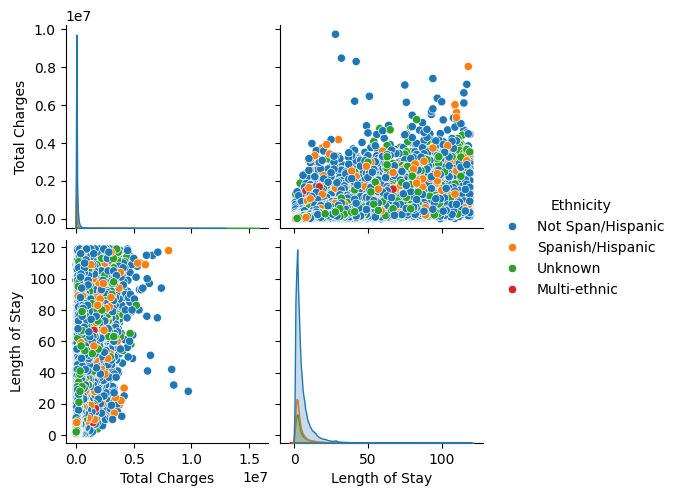

In [12]:
# Pairplot for Total Charges, Length of Stay, and Ethnicity
sns.pairplot(df_subset, hue='Ethnicity', vars=['Total Charges', 'Length of Stay'])
plt.show()